# Cargar bibliotecas

In [2]:
install.packages("tidyverse")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(tidyr)

All ready


# Cargar los datos

In [3]:
# Asignar los datos a la variable df
df <- read.csv("/content/AmesHousing_raw_data.csv")

# Visualizar los primeros datos del dataframe
head(df)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,⋯,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


# Eliminar las columnas que no aportan información

In [4]:
# Especifica los nombres de las columnas a eliminar
columns_to_delete <- c("Order", "PID", "Garage Yr Blt")

# Elimina las columnas especificadas
df <- df[, -which(names(df) %in% columns_to_delete)]

# Observe las primeras filas del nuevo data frame
head(df)

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,⋯,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,20,RL,141,31770,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93,11160,Pave,NA,Reg,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


# Modificar nombres de columnas

In [5]:
# Cambiar los nombres de las columnas con puntos a guiones bajos
names(df) <- names(df) %>%
             str_replace_all("\\.", "_") %>%
             tolower()

# Observe las primeras filas del nuevo data frame
head(df)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,⋯,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,20,RL,141,31770,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93,11160,Pave,NA,Reg,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


# Modificar el nombre de la columna de la variable objetivo "saleprice" por "sale_price"

In [6]:
# Cambiar el nombre de la columna
names(df)[names(df) == "saleprice"] <- "sale_price"
head(df)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,⋯,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,sale_price
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,20,RL,141,31770,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93,11160,Pave,NA,Reg,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


# Datos faltantes

## Contar los valores faltantes

In [7]:
# Contar la cantidad de datos faltantes en cada columna
missing_data_count <- colSums(is.na(df))

# Filtrar y mostrar solo las columnas que tienen datos faltantes
missing_data_count <- missing_data_count[missing_data_count > 0]

print("Cantidad de datos faltantes por columna:")
print(missing_data_count)


[1] "Cantidad de datos faltantes por columna:"
  lot_frontage          alley   mas_vnr_area      bsmt_qual      bsmt_cond 
           490           2732             23             79             79 
 bsmt_exposure bsmtfin_type_1   bsmtfin_sf_1 bsmtfin_type_2   bsmtfin_sf_2 
            79             79              1             79              1 
   bsmt_unf_sf  total_bsmt_sf bsmt_full_bath bsmt_half_bath   fireplace_qu 
             1              1              2              2           1422 
   garage_type  garage_yr_blt  garage_finish    garage_cars    garage_area 
           157            159            157              1              1 
   garage_qual    garage_cond        pool_qc          fence   misc_feature 
           158            158           2917           2358           2824 


## Gráfica de barras de columnas con más datos faltantes

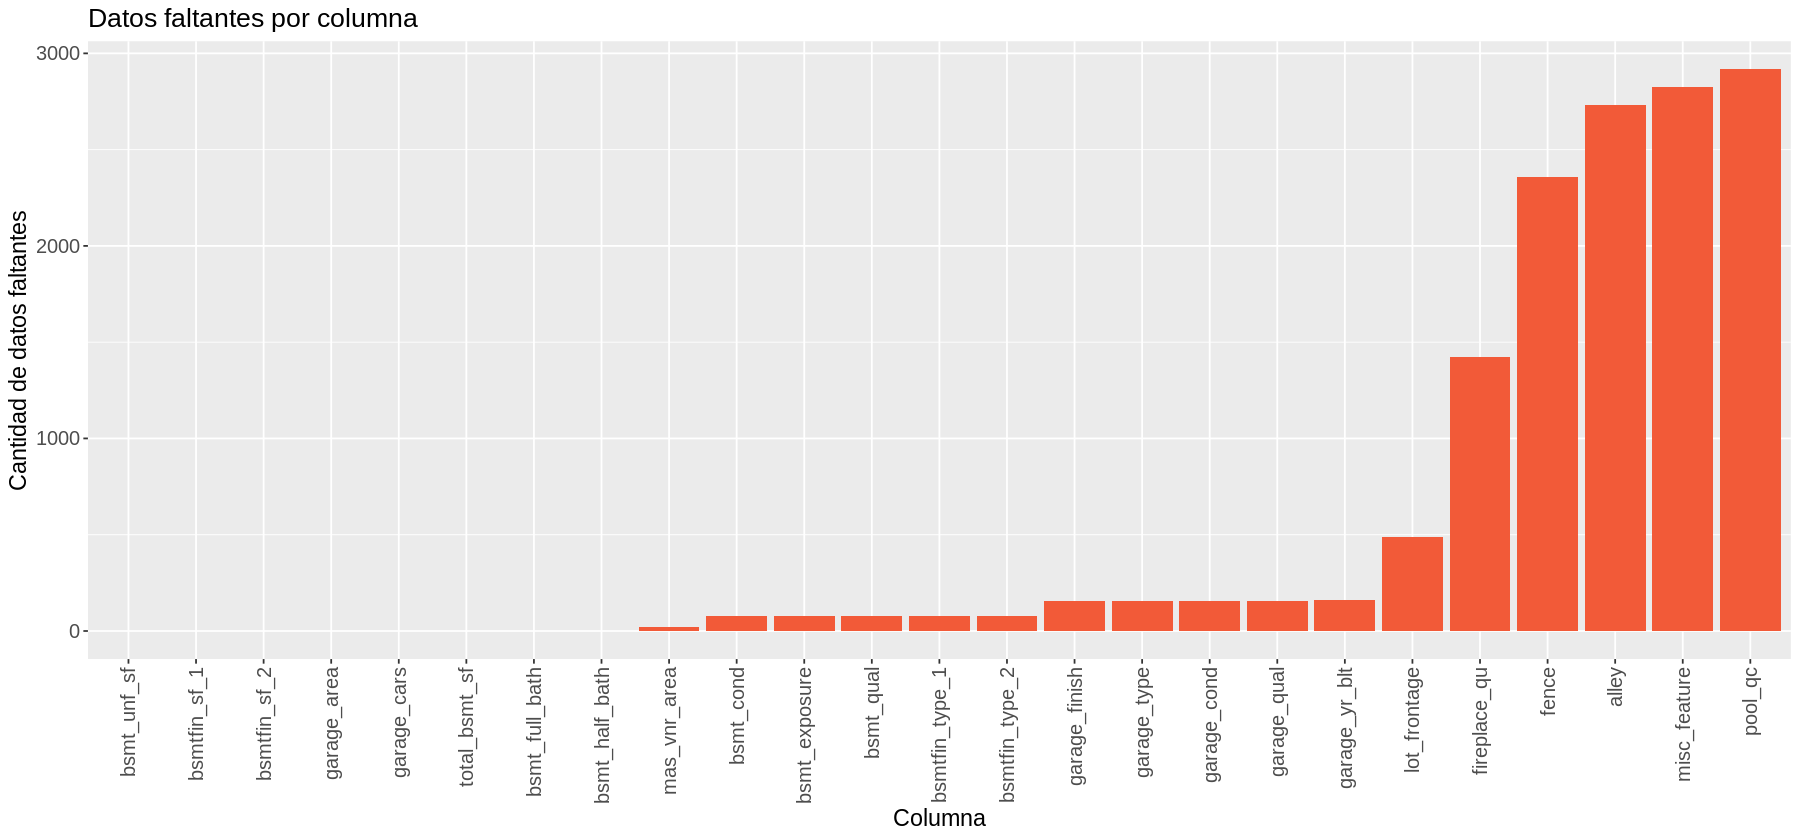

In [8]:

missing_data_df <- as.data.frame(missing_data_count)
missing_data_df$Columna <- rownames(missing_data_df)
colnames(missing_data_df) <- c("Faltantes", "Columna")
# Ajustar colores para el gráfico (Negro "#1F2226", Naranja "#F25A38" y Blanco "#FFFFFF")

# Ajustar opciones de tamaño de gráfico para el notebook
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(missing_data_df, aes(x = reorder(Columna, Faltantes), y = Faltantes, fill = "Orange")) +
    geom_bar(stat = "identity") +
    labs(title = "Datos faltantes por columna",
         x = "Columna",
         y = "Cantidad de datos faltantes") +
    theme(
      axis.title.x = element_text(size = 14), # Tamaño de la etiqueta del eje X
      axis.title.y = element_text(size = 14), # Tamaño de la etiqueta del eje Y
      plot.title = element_text(size = 16),    # Tamaño del título
      axis.text.x = element_text(size = 12, angle = 90, vjust = 0.5, hjust=1),  # Tamaño del texto de los ticks del eje X
      axis.text.y = element_text(size = 12)   # Tamaño del texto de los ticks del eje Y
    ) +
    scale_fill_manual(values = "#F25A38") +
    guides(fill = "none")

## Columnas con miles de datos faltantes

In [9]:


# Lista de columnas con más de mil valores faltantes
columns_to_replace <- c("alley", "mas_vnr_type", "fireplace_qu", "pool_qc", "fence", "misc_feature")

# Reemplazar los valores faltantes en las columnas seleccionadas
for (column in columns_to_replace) {
    df[[column]] <- replace_na(df[[column]], paste0("no_", column))
}

# Para el tipo NONE
df$mas_vnr_type <- ifelse(df$mas_vnr_type == "None" | is.na(df$mas_vnr_type),
                          "no_mas_vnr_type",
                          df$mas_vnr_type)

In [10]:
# Lista de columnas que modificamos
columns_to_replace <- c("alley", "mas_vnr_type", "fireplace_qu", "pool_qc", "fence", "misc_feature")

# Bucle para imprimir los recuentos de valores para cada columna
for (column in columns_to_replace) {
    cat(column, "value counts:\n")
    print(table(df[[column]], useNA = "ifany"))
    cat("-------------------------------------------\n")
}


alley value counts:

    Grvl no_alley     Pave 
     120     2732       78 
-------------------------------------------
mas_vnr_type value counts:

                         BrkCmn         BrkFace          CBlock no_mas_vnr_type 
             23              25             880               1            1752 
          Stone 
            249 
-------------------------------------------
fireplace_qu value counts:

             Ex              Fa              Gd no_fireplace_qu              Po 
             43              75             744            1422              46 
             TA 
            600 
-------------------------------------------
pool_qc value counts:

        Ex         Fa         Gd no_pool_qc         TA 
         4          2          4       2917          3 
-------------------------------------------
fence value counts:

   GdPrv     GdWo    MnPrv     MnWw no_fence 
     118      112      330       12     2358 
-------------------------------------------
misc_fe

## Revisión de columnas con datos faltantes inferiores a mil

In [11]:
# Contar la cantidad de datos faltantes en cada columna
missing_data_count <- colSums(is.na(df))

# Filtrar y mostrar solo las columnas que tienen datos faltantes
missing_data_count <- missing_data_count[missing_data_count > 0]

# Imprimir la cantidad de datos faltantes por columna
cat("Cantidad de datos faltantes por columna:\n")
print(missing_data_count)

Cantidad de datos faltantes por columna:
  lot_frontage   mas_vnr_area      bsmt_qual      bsmt_cond  bsmt_exposure 
           490             23             79             79             79 
bsmtfin_type_1   bsmtfin_sf_1 bsmtfin_type_2   bsmtfin_sf_2    bsmt_unf_sf 
            79              1             79              1              1 
 total_bsmt_sf bsmt_full_bath bsmt_half_bath    garage_type  garage_yr_blt 
             1              2              2            157            159 
 garage_finish    garage_cars    garage_area    garage_qual    garage_cond 
           157              1              1            158            158 


In [12]:
# Lista de columnas
columns_to_check <- c("lot_frontage", "mas_vnr_area", "bsmt_qual", "bsmt_cond",
                      "bsmt_exposure", "bsmtfin_type_1", "bsmtfin_sf_1",
                      "bsmtfin_type_2", "bsmtfin_sf_2", "bsmt_unf_sf",
                      "total_bsmt_sf", "electrical", "bsmt_full_bath",
                      "bsmt_half_bath", "garage_type", "garage_finish",
                      "garage_cars", "garage_area", "garage_qual", "garage_cond")

# Verificar el tipo de dato de cada columna
column_data_types <- sapply(df[, columns_to_check], class)

# Imprimir los resultados
print(column_data_types)

  lot_frontage   mas_vnr_area      bsmt_qual      bsmt_cond  bsmt_exposure 
     "integer"      "integer"    "character"    "character"    "character" 
bsmtfin_type_1   bsmtfin_sf_1 bsmtfin_type_2   bsmtfin_sf_2    bsmt_unf_sf 
   "character"      "integer"    "character"      "integer"      "integer" 
 total_bsmt_sf     electrical bsmt_full_bath bsmt_half_bath    garage_type 
     "integer"    "character"      "integer"      "integer"    "character" 
 garage_finish    garage_cars    garage_area    garage_qual    garage_cond 
   "character"      "integer"      "integer"    "character"    "character" 


In [13]:


# Reemplazar valores faltantes en 'electrical' con 'unknown'
df$electrical <- replace_na(df$electrical, "unknown")

# Lista de columnas relacionadas con el garaje
garage_columns <- c("garage_type", "garage_finish", "garage_qual", "garage_cond")
# Reemplazar los valores faltantes en las columnas del garaje con 'no_garage'
df[garage_columns] <- lapply(df[garage_columns], function(x) replace_na(x, "no_garage"))

# Lista de columnas relacionadas con el sótano
basement_columns <- c("bsmt_qual", "bsmt_cond", "bsmt_exposure", "bsmtfin_type_1", "bsmtfin_type_2")
# Reemplazar los valores faltantes en las columnas del sótano con 'no_basement'
df[basement_columns] <- lapply(df[basement_columns], function(x) replace_na(x, "no_basement"))


In [14]:
# Lista de columnas para rellenar con ceros
columns_to_fill_with_zeros <- c("lot_frontage", "mas_vnr_area", "bsmtfin_sf_1",
                                "bsmtfin_sf_2", "bsmt_unf_sf", "total_bsmt_sf",
                                "bsmt_full_bath", "bsmt_half_bath", "garage_cars", "garage_area")

# Reemplazar los valores faltantes en las columnas especificadas con 0
df[columns_to_fill_with_zeros] <- lapply(df[columns_to_fill_with_zeros], function(x) replace_na(x, 0))

# Contar la cantidad de datos faltantes en cada columna
missing_data_count <- colSums(is.na(df))

# Filtrar y mostrar solo las columnas que tienen datos faltantes
missing_data_count <- missing_data_count[missing_data_count > 0]

# Imprimir la cantidad de datos faltantes por columna
cat("Cantidad de datos faltantes por columna:\n")
print(missing_data_count)


Cantidad de datos faltantes por columna:
garage_yr_blt 
          159 


# Aplicación de Label Encoding

In [15]:


# Identificar las columnas de tipo factor
object_columns <- sapply(df, is.factor)

# Aplicar Label Encoding a cada columna de tipo factor
df[object_columns] <- lapply(df[object_columns], function(x) as.integer(as.factor(x)))


In [16]:
head(df)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,⋯,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,sale_price
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,20,RL,141,31770,Pave,no_alley,IR1,Lvl,AllPub,Corner,⋯,0,no_pool_qc,no_fence,no_misc_feature,0,5,2010,WD,Normal,215000
2,20,RH,80,11622,Pave,no_alley,Reg,Lvl,AllPub,Inside,⋯,0,no_pool_qc,MnPrv,no_misc_feature,0,6,2010,WD,Normal,105000
3,20,RL,81,14267,Pave,no_alley,IR1,Lvl,AllPub,Corner,⋯,0,no_pool_qc,no_fence,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93,11160,Pave,no_alley,Reg,Lvl,AllPub,Corner,⋯,0,no_pool_qc,no_fence,no_misc_feature,0,4,2010,WD,Normal,244000
5,60,RL,74,13830,Pave,no_alley,IR1,Lvl,AllPub,Inside,⋯,0,no_pool_qc,MnPrv,no_misc_feature,0,3,2010,WD,Normal,189900
6,60,RL,78,9978,Pave,no_alley,IR1,Lvl,AllPub,Inside,⋯,0,no_pool_qc,no_fence,no_misc_feature,0,6,2010,WD,Normal,195500


In [17]:
# Seleccionar solo columnas numéricas
numeric_columns <- sapply(df, is.numeric)

# Excluir 'sale_price' y columnas de tipo objeto de la estandarización
cols_to_scale <- setdiff(names(df)[numeric_columns], c("sale_price", names(df)[object_columns]))

# Ajustar y transformar las columnas seleccionadas
df[cols_to_scale] <- scale(df[cols_to_scale])

# Imprimir las primeras filas del DataFrame
print(head(df))


  ms_subclass ms_zoning lot_frontage    lot_area street    alley lot_shape
1  -0.8768552        RL    2.4881675  2.74391236   Pave no_alley       IR1
2  -0.8768552        RH    0.6672415  0.18706533   Pave no_alley       Reg
3  -0.8768552        RL    0.6970928  0.52272448   Pave no_alley       IR1
4  -0.8768552        RL    1.0553077  0.12843602   Pave no_alley       Reg
5   0.0612746        RL    0.4881341  0.46726775   Pave no_alley       IR1
6   0.0612746        RL    0.6075390 -0.02156364   Pave no_alley       IR1
  land_contour utilities lot_config land_slope neighborhood condition_1
1          Lvl    AllPub     Corner        Gtl        NAmes        Norm
2          Lvl    AllPub     Inside        Gtl        NAmes       Feedr
3          Lvl    AllPub     Corner        Gtl        NAmes        Norm
4          Lvl    AllPub     Corner        Gtl        NAmes        Norm
5          Lvl    AllPub     Inside        Gtl      Gilbert        Norm
6          Lvl    AllPub     Inside        

## Almacenamiento del dataframe en archivo CSV

In [20]:
# Se guarda en archivo con write.csv()
write.csv(df, "AmesHousing_processed_data.csv", row.names = FALSE)